# Optimization

https://spacemath.gsfc.nasa.gov/Calculus/5Page60.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pow

Satellites are designed to optimize the number of experiments they can carry, while at the same time keeping the mass and power requirements at a minimum. The picture shows the IMAGE satellite with the dark solar cells attached to its surface.

Here is one example of a simple problem that can be encountered by a satellite designer.

A satellite is designed to fit inside the nose-cone (shroud) of a Delta II rocket. There is only enough room for a single satellite, and it cannot have deployable solar panels to generate electricity using solar cells. Instead, the solar cells have to be mounted on the exterior surface of the satellite. At the same time, the satellite configuration is that of a hexagonal prism. The total volume of the satellite is 10 cubic meters. The solar cells will be mounted on the hexagonal top, bottom, and the rectangular side panels of the satellite.

**Problem 1** - If the width of a panel is W, and the height of the satellite is H, what are the dimensions of the satellite that minimize the surface area and hence the available power that can be generated by the solar cells?

Find function for panel height:
$$ V = 10\text{m}^3 $$
$$ 10 = \frac{3\sqrt{3}}{2}W^2H $$
$$ H = \frac{20}{3\sqrt{3}W^2} $$

In [2]:
H = lambda W: (20 / (3 * sqrt(3) * (W ** 2)))

Find function for surface area:
$$ SA = 2B + 6WH $$
$$ SA = 3\sqrt{3}W^2 + 6W(\frac{20}{3\sqrt{3}W^2}) $$
$$ SA = 3\sqrt{3}W^2 + \frac{40}{\sqrt{3}W} $$

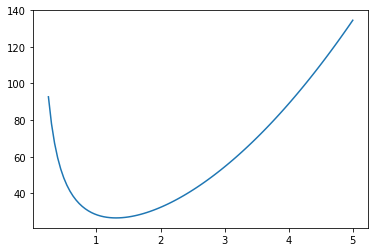

In [3]:
SA = lambda W: (3 * sqrt(3) * (W ** 2)) + (40 / (sqrt(3) * W))
W = np.linspace(0.25, 5, 100)
plt.plot(W, SA(W))

Find derivative of surface area function:
$$ SA' = 6\sqrt{3} - \frac{40}{\sqrt{3}W^2} $$

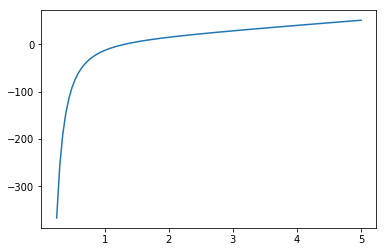

In [4]:
dSA = lambda W: (6 * sqrt(3) * W) - (40 / (sqrt(3) * (W ** 2)))
plt.plot(W, dSA(W))

Find zeroes of the surface area derivative:
$$ 0 = 6\sqrt{3}W - \frac{40}{\sqrt{3}W^2} $$
$$ 0 = 18W^3 - 40 $$
$$ W = \sqrt[3]{\frac{20}{9}} $$
$$ W = 1.305\text{m} $$

In [5]:
min_W = pow(20 / 9, 1 / 3)
min_W

1.3049558803896213

In [6]:
# Verify that our result is indeed a zero
dSA(min_W)

1.7763568394002505e-15

Find the height of the panel, given the width:
$$ H(1.305) = \frac{20}{3\sqrt{3}(1.305)^2} $$
$$ H = 2.260 $$

In [7]:
min_H = H(min_W)
min_H

2.260249886470598

The dimensions of the satellite that minimize its surface area are $\color{red}{W = 1.305}$ and $\color{red}{H = 2.260}$.

**Problem 2** - If only 1/2 of the solar cells receive light at any one time, and the power they can deliver is 100 watts per square meter, what is the power that this satellite can provide to the experiments and operating systems?

In [8]:
min_sa = SA(min_W)
min_sa

26.545737424498036

In [9]:
power_output = (min_sa * 100) / 2
power_output

1327.2868712249017

The power that this satellite can provide to the experiments and operating systems is about $\color{red}{1327.287\text{ watts}}$.

**Problem 3** - If the mass of the panels is 3 kg per square meter, what is the total mass of this satellite?

In [10]:
total_mass = min_sa * 3
total_mass

79.6372122734941

The total mass of this satellite is about $\color{red}{79.637\text{ kg}}$.

**Problem 4** - If the launch cost is $10,000 per pound, how much will it cost to place this satellite into orbit? (Note, 1 pound = 0.453 kilograms).

In [11]:
total_cost = total_mass * 10000 / 0.453
total_cost

1757995.855927022

The cost to place this satellite into orbit is about $\color{red}{\$1,757,995.86}$.